In [15]:
setwd('/import/DB/fel/BJTC-204')

In [16]:
library(dplyr)

In [17]:
data = readRDS('all.data.rds') %>% dplyr::filter(TYPE  == 'MDD')

In [18]:
rownames(data) = data$GSM

In [29]:
nmfinput = data[,c('MUS81','UCK2','CNIH3','OTUD4')] %>% t() 

In [30]:
library(NMF)

In [31]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`)."


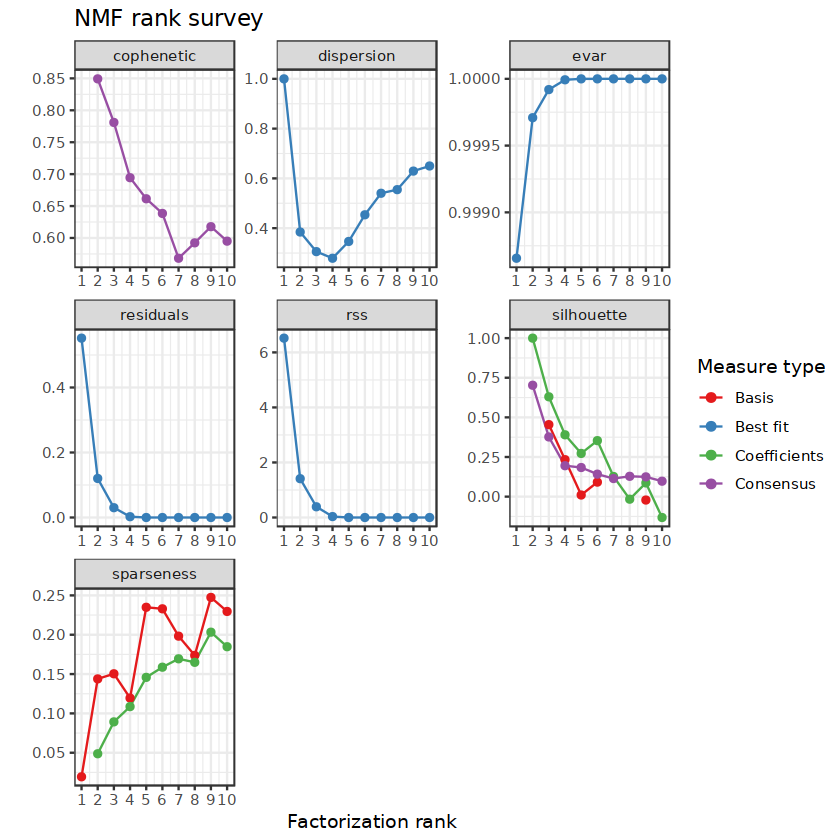

In [32]:
plot(estim.coad)

In [35]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21 12 

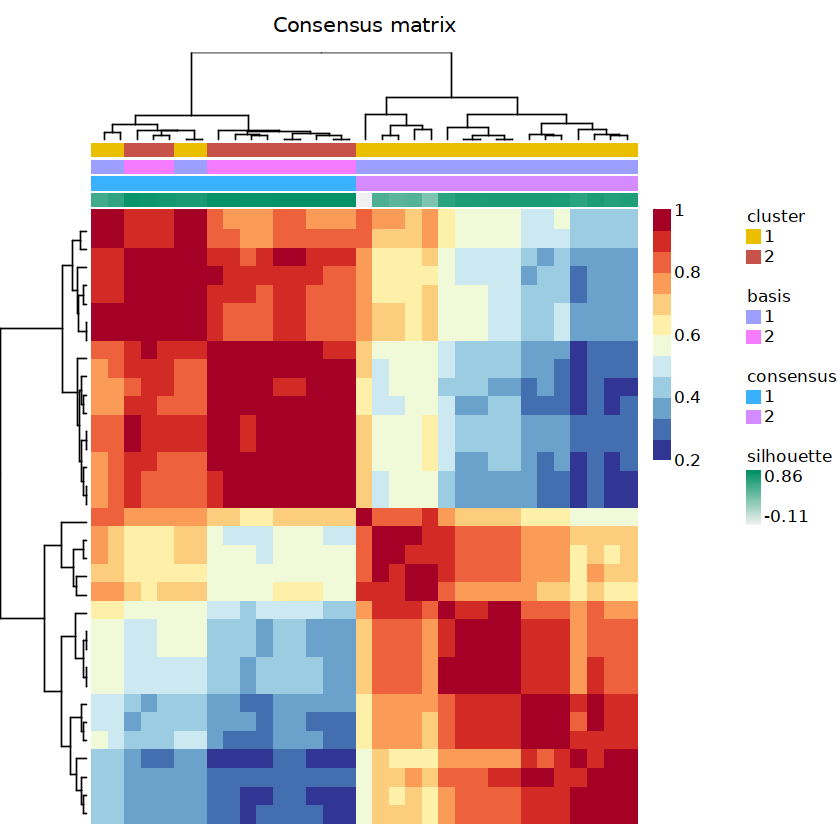

In [37]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [38]:
library(tinyarray)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree




Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




In [45]:
a = data[colnames(nmfinput),8:11882] %>%  t() %>%  as.data.frame()

In [53]:
cg=names(tail(sort(apply(a,1,sd)),1000))
n=a[cg,]

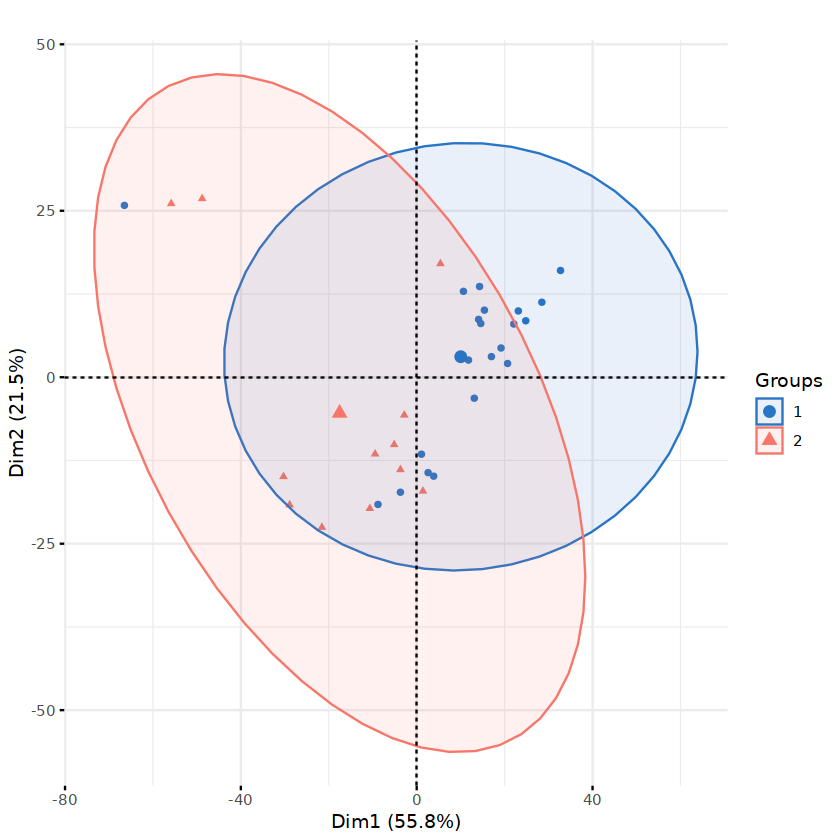

In [54]:
draw_pca(n,group)

In [55]:
group

GSM2432065 GSM2431907 GSM2431944 GSM2432077 GSM2431900 GSM2431925 GSM2431807 
         1          1          2          1          2          1          2 
GSM2431788 GSM2431971 GSM2431792 GSM2432033 GSM2431933 GSM2432081 GSM2431802 
         2          1          1          2          1          1          1 
GSM2432023 GSM2432027 GSM2431940 GSM2431959 GSM2431735 GSM2432085 GSM2431914 
         2          2          1          1          1          2          2 
GSM2431969 GSM2432068 GSM2432036 GSM2432007 GSM2431970 GSM2432037 GSM2431770 
         1          1          1          1          1          1          1 
GSM2431977 GSM2431867 GSM2431941 GSM2432086 GSM2432052 
         2          1          2          1          2 
attr(,"what")
[1] columns
Levels: 1 2

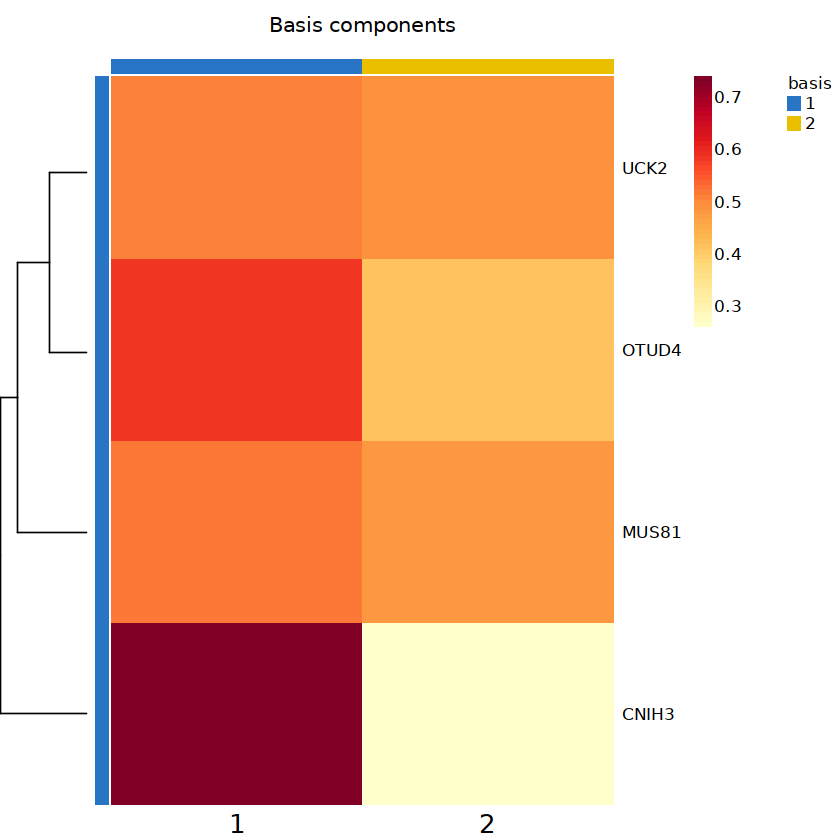

In [56]:
basismap(nmf.rank4,
         cexCol = 1.5,
         cexRow = 1,
         annColors=list(c("#2874C5","#EABF00","#C6524A","#868686")))

In [62]:
options(repr.plot.width = 6,repr.plot.height = 5)

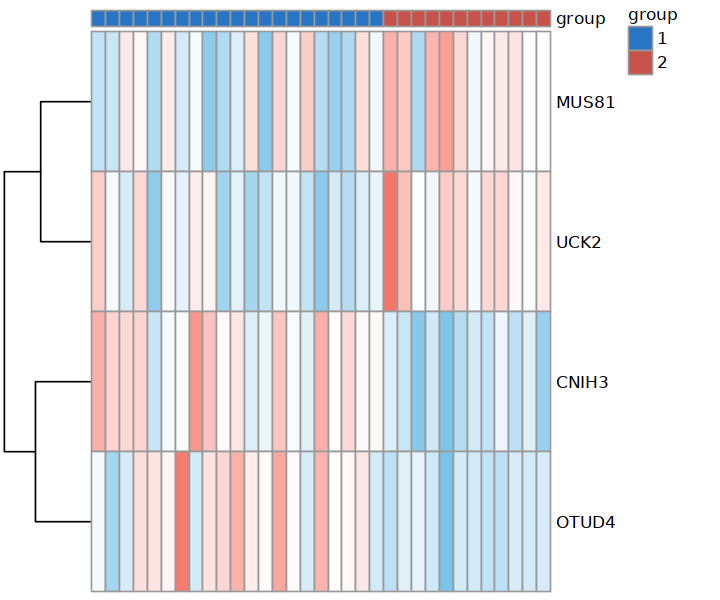

In [64]:
dp = nmfinput[,order(group)]
draw_heatmap(dp,sort(group),
             color_an = c("#2874C5","#C6524A","#868686"),
             annotation_legend = T,
             cluster_cols = F,
             show_rownames = T)

### 比较临床数据特征

In [69]:
head(data,4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2,year
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GSM2432065,1,MDD,6.30,M,Caucasian,29,GSM2432065,6.237568,5.583211,7.579501,...,8.315283,6.399517,4.323863,5.659754,4.797551,7.962246,7.332547,5.610757,6.339007,young
GSM2431907,0,MDD,6.33,M,Caucasian,77,GSM2431907,5.352166,5.640191,8.000693,...,8.427767,6.455614,4.456674,4.997189,4.785772,7.248470,7.321507,5.848929,5.891128,old
GSM2431944,0,MDD,6.41,M,Caucasian,48,GSM2431944,5.765387,5.942728,8.069399,...,8.268419,6.688057,4.513670,5.746881,4.858030,7.369242,7.555207,5.096798,6.548040,young
GSM2432077,0,MDD,6.47,M,Caucasian,62,GSM2432077,5.894335,5.533398,7.873714,...,8.399662,6.670657,4.284225,5.533662,4.795056,7.550895,7.574385,6.169734,5.736552,old


In [67]:
group1 = as.data.frame(group)

In [70]:
diamonds2  = cbind(group1,data)

In [71]:
library(ggstatsplot)
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggstatsplot' was built under R version 4.2.3"
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [80]:
table(data$death)


 0  1 
14 19 

In [81]:
table(data$Gender)


 F  M 
 6 27 

In [82]:
table(data$year)


  old young 
    6    27 

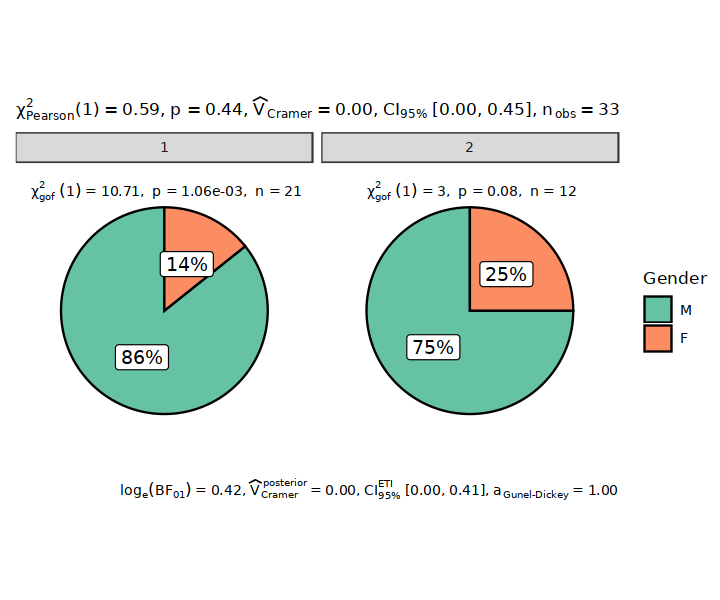

In [77]:
ggpiestats(diamonds2, Gender, group, palette = 'Set2')

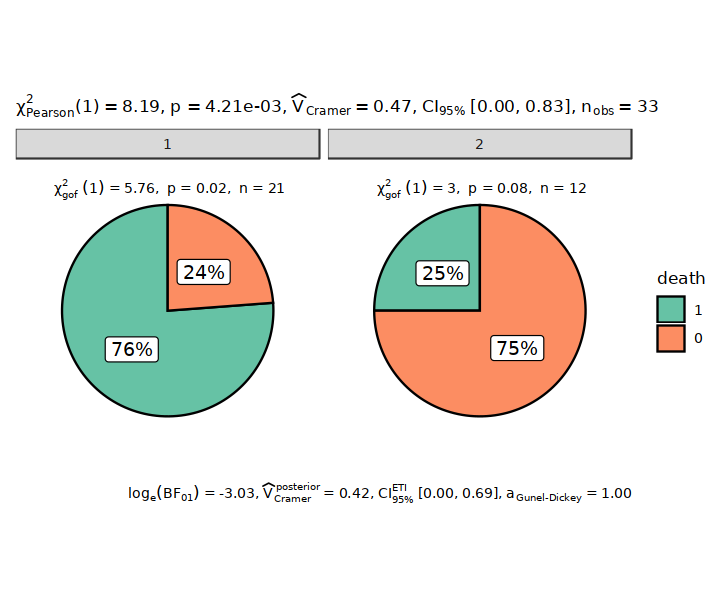

In [76]:
ggpiestats(diamonds2, death, group, palette = 'Set2')

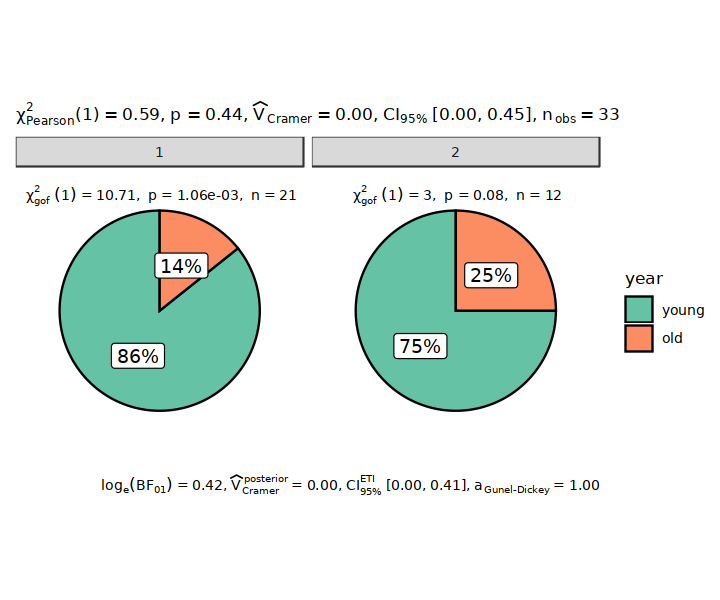

In [78]:
ggpiestats(diamonds2, year, group, palette = 'Set2')